# 1. Общая информация
Мобильная игра зарабатывает на показе рекламы. 

Есть несколько форматов:
- int – полноэкранная реклама; 
- banner – горизонтальный баннер, висит внизу экрана пока юзер играет; 
- rv – видео, которое юзер смотрит по желанию и за
просмотр получает монетки или др. ресурсы.

Информация о каждом показе отправляется в аналитику и содержит доход от показа, формат показанной 
рекламы, рекламную сеть от которой был показ и др.

eCPM – доход за 1000 показов рекламы.

# 2. Бизнес задача
Провести исследование показов рекламы с целью понять на сколько
отличается eCPM в зависимости от географии (города) юзера, версии ОС и
других параметров. Интересны любые инсайты и находки по eCPM-ам.
Этот csv файл содержит информацию о показах рекламы для юзеров США:
https://drive.google.com/drive/folders/1bjWlzyXV8ALcoxZYrdNQH6_MOm3nS3Pl?usp=sharing

# 3. Что требуется
1. Для каждого формата рекламы:
- a. построить распределение средних eCPM-ов юзеров
- b. построить распределение eCPM-ов по городам, версиям ОС
- c. построить распределение доходов по городам, версиям ОС
2. Учесть статистическую значимость (отобразить, отфильтровать незначимое
или хотя бы прокомментировать). Объяснить решение.
3. Описать наблюдения и вывод по исследованию.

# 4. Дополнительные (по желанию)
Исследовать:
- Какой процент доходов содержит информацию о городе юзера
- Зависит ли eCPM от времени дня

# 5. Вспомогательная информация
- Столбец profile_id – id юзера

Столбец event_json содержит данные о событии показа рекламы:
- ad_type – формат рекламы (int, banner или rv)
- placement – когда/где был показ рекламы в игре
- view_index – номер показа конкретного формата рекламы для юзера (не
поддерживается для баннеров)

- revenue – доход от конкретного показа рекламы (eCPM = revenue * 1000)
- ads_ltv – накапливающийся доход от рекламы, равен сумме всех revenue
юзера
- network_name – рекламная сеть, от которой был показ

Остальные столбцы должны быть интуитивно понятны

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("ad_revenue.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860079 entries, 0 to 860078
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   profile_id               860065 non-null  object
 1   os_version               860079 non-null  object
 2   device_manufacturer      860079 non-null  object
 3   device_model             860079 non-null  object
 4   device_type              860079 non-null  object
 5   device_locale            860079 non-null  object
 6   event_name               860079 non-null  object
 7   event_json               860079 non-null  object
 8   event_datetime           860079 non-null  object
 9   event_timestamp          860079 non-null  int64 
 10  event_receive_datetime   860079 non-null  object
 11  event_receive_timestamp  860079 non-null  int64 
 12  connection_type          860079 non-null  object
 13  operator_name            841200 non-null  object
 14  country_iso_code    

In [34]:
data.head()

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN


In [4]:
data.event_datetime = pd.to_datetime(data.event_datetime)

In [5]:
data.describe(include='object')

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_receive_datetime,connection_type,operator_name,country_iso_code,city
count,860065,860079,860079,860079,860079,860079,860079,860079,860079,860079,841200,860079,536371
unique,4226,11,34,284,2,9,1,860076,180237,3,92,1,920
top,JL5pmKYe8g7,12,Samsung,Galaxy S21 Ultra 5G,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""lose_offer_attem...",2022-02-06 19:00:32,wifi,Verizon,US,New York
freq,8486,407587,651633,54845,835667,856257,860079,2,651,624421,288720,860079,17584


In [6]:
import json

In [7]:
event_data = pd.json_normalize(data.event_json.map(json.loads))

In [8]:
event_data.head()

,ad_type,placement,view_index,session_view_index,cur_ticks,session_length,revenue,ads_ltv,ecpm_sma,normalized_ecpm_sma,value,currency,ad_country_code,network_name,ad_unit_id,ad_network_placement,creativeId
0,banner,,1,0,637795729492245130,705.88070,0.000510,0.487877,0.511508,0.511508,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CJ3XirfD5vUCFYPnKAUdG3MOYQ
1,banner,,1,0,637795729659949790,722.65120,0.000510,0.488387,0.511389,0.511389,0.000510,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/8825263691,CNa-lL_D5vUCFZrpKAUdU2QBDQ
2,banner,,1,0,637796515863735930,431.81290,0.002386,0.678479,0.928597,0.928597,0.002386,USD,US,APPLOVIN_EXCHANGE,64c6b1114ea8c1cc,banner_regular,pandora-58
3,int,next_level,1,1,637797353426827330,125.94960,0.013894,0.013894,13.782633,13.893784,0.013894,USD,US,AppLovin,3ab7705b07ebb75f,inter_regular,13045364
4,banner,,1,0,637797357392197840,12.71129,0.006828,0.060571,1.660282,1.660282,0.006828,USD,US,Google AdMob,64c6b1114ea8c1cc,ca-app-pub-7511632782617496/6197324251,CMTi5e-h6_UCFUdVwQodt9EIMw


In [37]:
event_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860079 entries, 0 to 860078
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ad_type               860079 non-null  object 
 1   placement             860079 non-null  object 
 2   view_index            860079 non-null  int64  
 3   session_view_index    860079 non-null  int64  
 4   cur_ticks             860079 non-null  int64  
 5   session_length        860079 non-null  float64
 6   revenue               860079 non-null  float64
 7   ads_ltv               860079 non-null  float64
 8   ecpm_sma              860079 non-null  float64
 9   normalized_ecpm_sma   860079 non-null  float64
 10  value                 860079 non-null  float64
 11  currency              860079 non-null  object 
 12  ad_country_code       860079 non-null  object 
 13  network_name          860079 non-null  object 
 14  ad_unit_id            860079 non-null  object 
 15  

Для каждого формата рекламы:
- a. построить распределение средних eCPM-ов юзеров
- b. построить распределение eCPM-ов по городам, версиям ОС
- c. построить распределение доходов по городам, версиям ОС

### Построим распределение средних eCPM пользователей для каждого типа рекламы 

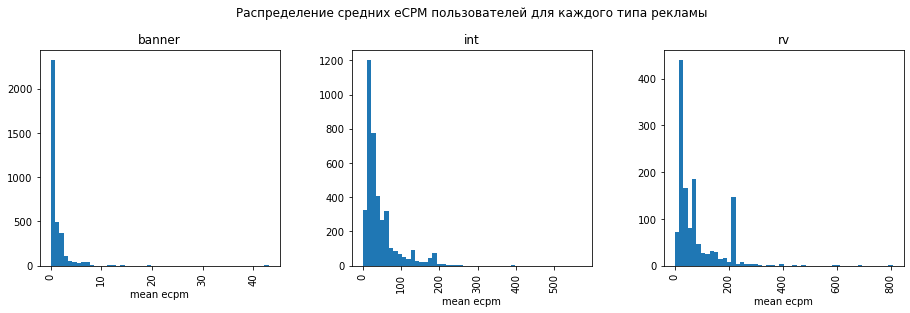

In [232]:
axs = (event_data.groupby(["ad_type",data["profile_id"]]).revenue.mean()*1000) \
    .hist(bins=50, by='ad_type', figsize=(15,4),layout=(1,3))
for a in axs:
    a.set_xlabel("mean ecpm")
plt.suptitle("Распределение средних eCPM пользователей для каждого типа рекламы",y=1.05);

Из гистограмм видно, что распределения имеют длинные хвосты, посчитаем 95% квантиль, а также построим box-plot чтобы понять, в каком интервале находится основная масса eCPM: 

In [90]:
(event_data.groupby(["ad_type",data["profile_id"]]).revenue.mean()*1000).groupby("ad_type") \
    .describe(percentiles=[0.25, 0.5, 0.75, 0.97])

,count,mean,std,min,25%,50%,75%,95%,max
ad_type,,,,,,,,,
banner,3508.0,1.157111,1.867792,0.013930,0.322804,0.583002,1.297329,4.061165,43.021387
int,3962.0,45.557457,46.877344,0.000000,17.620615,27.623670,56.397665,151.450656,568.678270
rv,1324.0,80.502004,79.154906,0.223222,28.240000,46.019935,98.067206,211.700000,808.294820


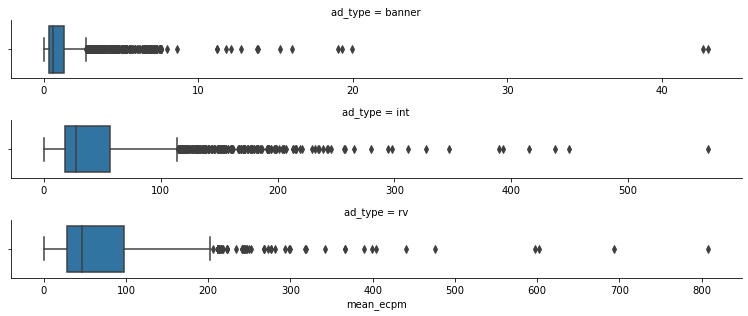

In [266]:
sns.catplot(x='mean_ecpm',
            row='ad_type',
            data=(event_data.groupby(["ad_type",data["profile_id"]]).revenue.mean()*1000).rename("mean_ecpm").reset_index(),
            kind="box",
            sharex=False,
            aspect=7,
            height=1.5
)

Видим, что для всех типов рекламы наблюдаются выбросы в значениях eCPM, мы можем отфильтровать эти редкие события либо по значению в 1.5IQR, либо взять пороговое значение в 0.05 и отфильровать все значения, которые встречаются реже(как раз по 95% квантилю).
Существуют и другие методы для фильтрации статистическиз выбросов — например, Фильтр Хэмпеля(отсеять значения, которые больше медианы на 3 медианных абс. отклонения), либо тест Граббса или Рознера

Стоит обратить внимание на ярко выраженный пик для видео-рекламы, нужно выяснить, чем это может объясняться (может быть просто случайность), либо это может быть связано с тем, что пользователи получают бонусы за эту рекламу и сами хотят смотреть её и досматривают до конца и охотнее взаимодейтсвуют с ней.

### Посмотрим на средний eCPM среди различных версий ОС:

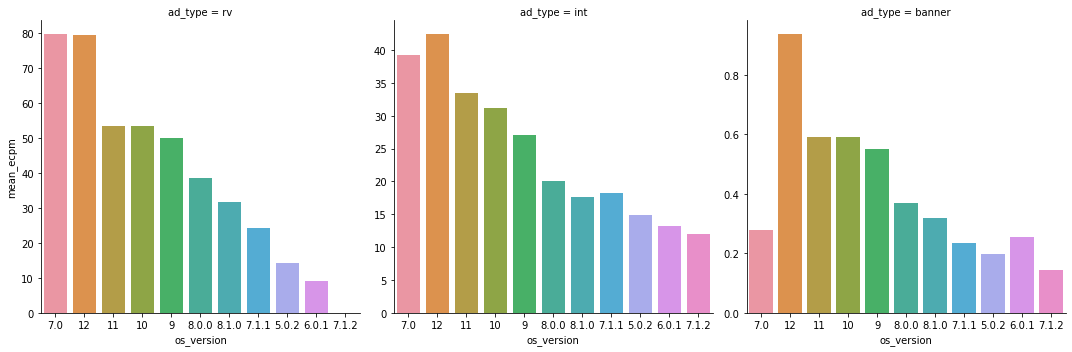

In [255]:
sns.catplot(
    data=(event_data.groupby(["ad_type",data["os_version"].fillna("no-info")],sort=False)
          .revenue.mean().rename("mean_ecpm").sort_values(ascending=False)*1000).reset_index(),
    x='os_version',
    y='mean_ecpm',
    col='ad_type',
    kind='bar',
    sharey=False
)

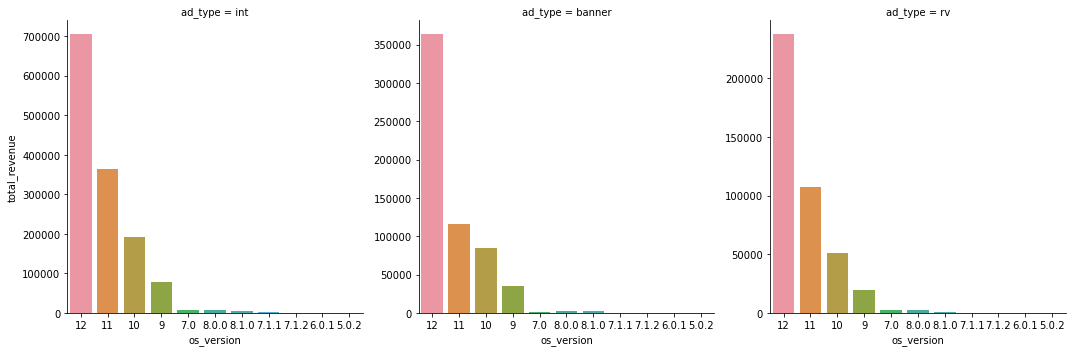

In [348]:
sns.catplot(
    data=(event_data.groupby(["ad_type",data["os_version"].fillna("no-info")],sort=False)
          .revenue.sum().rename("total_revenue").sort_values(ascending=False)*1000).reset_index(),
    x='os_version',
    y='total_revenue',
    col='ad_type',
    kind='bar',
    sharey=False
)

Из распределения средних значений по версиям ОС можем заметить, что хотя полноэкранная и видео-реклама имеют похожие распределения, но для баннерной — всё совсем по-другому, видим, что на 7 версии системы падают доходы, нужно выяснить с чем это может быть свзяано(может быть баннеры не отображаются на некоторых устройствах с 7 версией?).

### Построим распределение среднего eCPM по городам

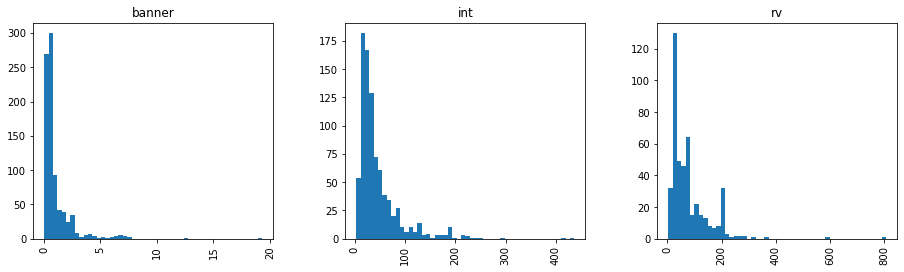

In [257]:
(event_data.groupby(["ad_type",data["city"]],dropna=False).revenue.mean()*1000) \
    .hist(by='ad_type',bins=50, figsize=(15,4), layout=(1,3));

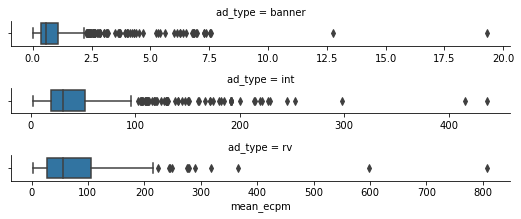

In [267]:
sns.catplot(
    x='mean_ecpm',
    data=(event_data.groupby(["ad_type",data["city"]]).revenue.mean()*1000).rename("mean_ecpm").reset_index(),
    row='ad_type',
    kind="box",
    sharex=False,
    aspect=7,
    height=1.05
)

Если построить распределение среднего eCPM по городам, видно, что доходы распределены схожим образом с распределением по пользователям, так что попробуем найти топ-города(и анти-топ) по среднему значению eCPM и суммарной прибыли

#### топ городов по средним значениям eCPM

C:\anaconda\lib\site-packages\seaborn\categorical.py:3808: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)


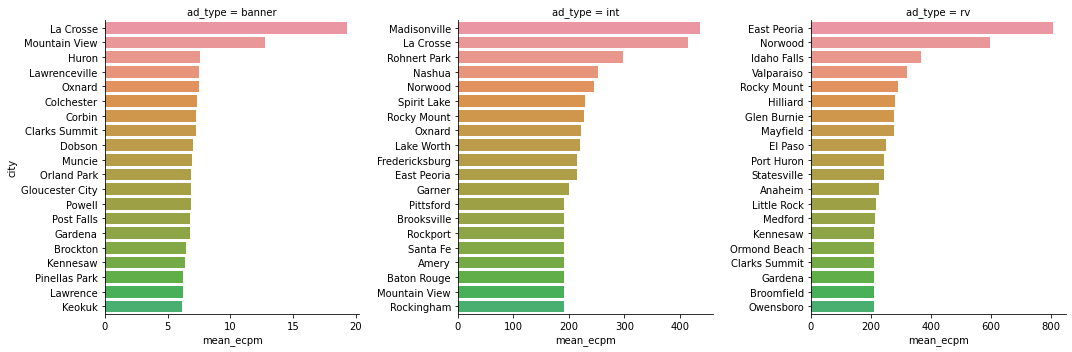

In [280]:
sns.catplot(
    data=(event_data.groupby(["ad_type",data["city"].fillna("no-info")], sort=False).revenue.mean()*1000).rename("mean_ecpm") \
    .groupby('ad_type', group_keys=False).nlargest(20).reset_index(),
    y='city',
    x='mean_ecpm',
    col='ad_type',
    kind='bar',
    sharex=False,
    sharey=False
)

Но если будем располагать города по суммарной выручке, то в топе оказываются самые крупные города Нью-Йорк, Хьюстон итд.,
также можем увидеть, что в данных много записей без указания города

C:\anaconda\lib\site-packages\seaborn\categorical.py:3808: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)


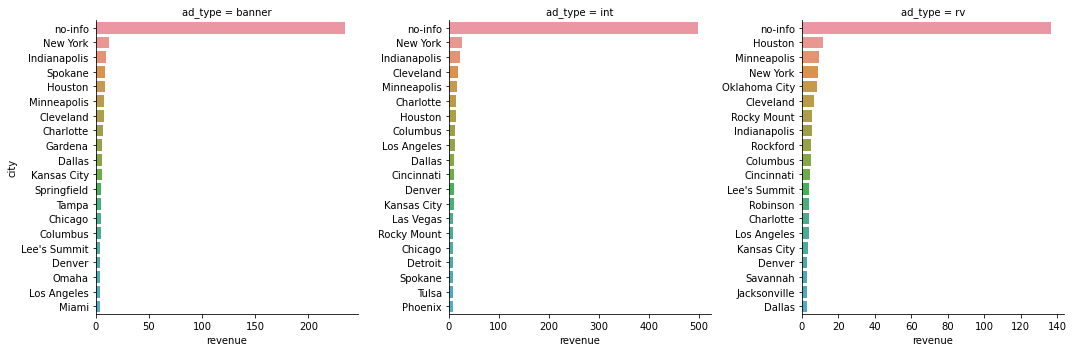

In [277]:
sns.catplot(
    data=(event_data.groupby(["ad_type",data["city"].fillna("no-info")], sort=False).revenue.sum()) \
    .groupby('ad_type', group_keys=False).nlargest(20).reset_index(),
    y='city',
    x='revenue',
    col='ad_type',
    kind='bar',
    sharex=False,
    sharey=False
)

C:\anaconda\lib\site-packages\seaborn\categorical.py:3808: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)


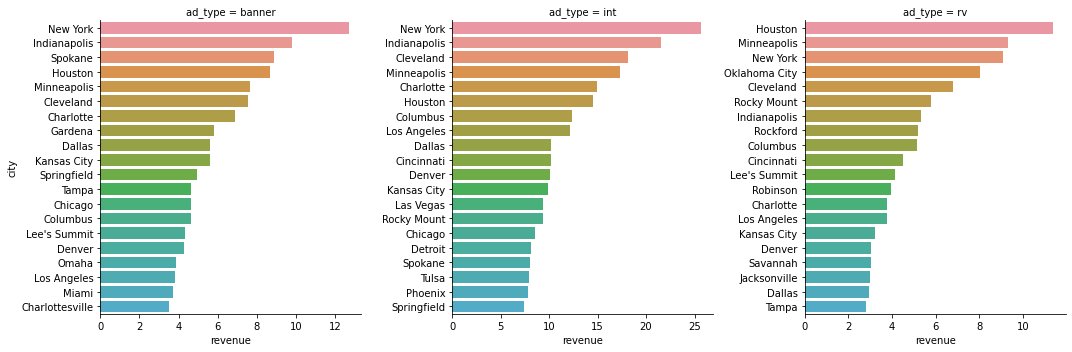

In [271]:
sns.catplot(
    data=(event_data.groupby(["ad_type",data["city"]], sort=False).revenue.sum()) \
    .groupby('ad_type', group_keys=False).nlargest(20).reset_index(),
    y='city',
    x='revenue',
    col='ad_type',
    kind='bar',
    sharex=False,
    sharey=False
)

C:\anaconda\lib\site-packages\seaborn\categorical.py:3808: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)


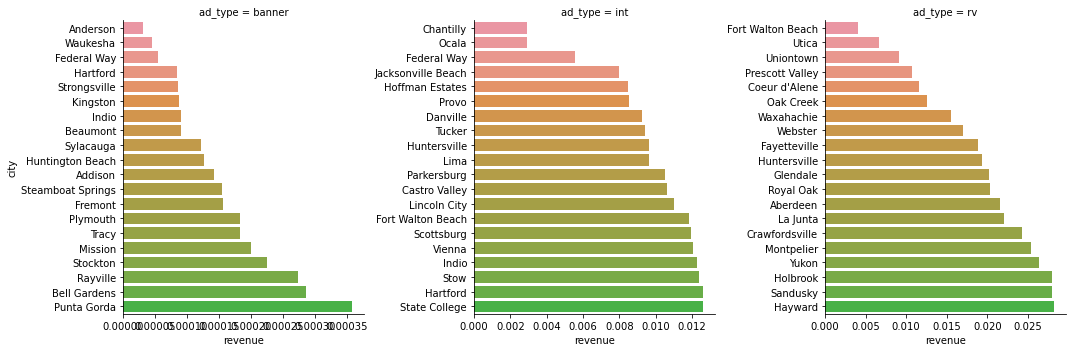

In [270]:
sns.catplot(
    data=(event_data.groupby(["ad_type",data["city"].fillna("no-info")], sort=False).revenue.sum()) \
    .groupby('ad_type', group_keys=False).nsmallest(20).reset_index(),
    y='city',
    x='revenue',
    col='ad_type',
    kind='bar',
    sharex=False,
    sharey=False
)

In [77]:
data.city.value_counts(dropna=False)

NaN              323708
New York          17584
Minneapolis       12980
Houston           10137
Springfield       10135
                  ...  
Picayune              1
Chambersburg          1
Morehead City         1
Bellflower            1
Swedesboro            1
Name: city, Length: 921, dtype: int64

In [107]:
data.city.value_counts(dropna=False, normalize=True)

NaN              0.376370
New York         0.020445
Minneapolis      0.015092
Houston          0.011786
Springfield      0.011784
                   ...   
Picayune         0.000001
Chambersburg     0.000001
Morehead City    0.000001
Bellflower       0.000001
Swedesboro       0.000001
Name: city, Length: 921, dtype: float64

#### Посчитаем какой процент дохода содержит информацию о городе пользователя:

In [350]:
print(f"{data.city.notna().mean():.3%}")

62.363%


### Теперь посмотрим как меняется доход от рекламы в зависимости от времени суток:

In [352]:
revenue_per_day = event_data.groupby(["ad_type",data.event_datetime.dt.hour, data.event_datetime.dt.minute]).revenue.mean()
revenue_per_day.index.names=['ad_type','hour','min']

In [353]:
revenue_per_day

ad_type  hour  min
banner   0     0      0.000668
               1      0.000712
               2      0.000602
               3      0.000577
               4      0.000556
                        ...   
rv       23    55     0.028025
               56     0.033167
               57     0.082952
               58     0.032450
               59     0.028951
Name: revenue, Length: 4221, dtype: float64

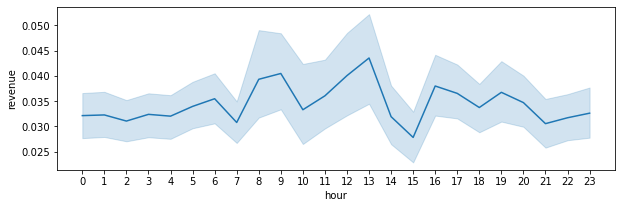

In [354]:
plt.figure(figsize=(10,3))
g=sns.lineplot(
    x="hour",
    y="revenue",
    data=revenue_per_day.reset_index(),
)
g.set_xticks(range(24));

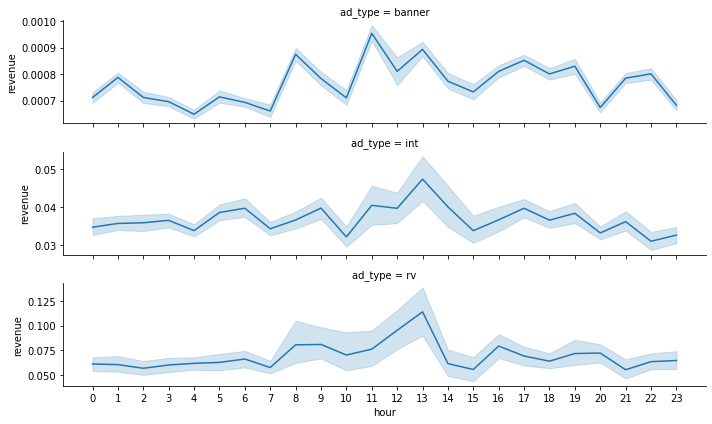

In [363]:
sns.relplot(x='hour', y='revenue', row='ad_type',
            data=revenue_per_day.reset_index(), 
            kind='line',
            facet_kws={"sharey":False},
            height=2,
            aspect=5
)
plt.xticks(range(24));

По графикам видно, как меняется прибыль от рекламы в течение суток, можно увидеть, как в утренние часы с 7 до 8-9 (после пробуждения и пока добирается до работы/учебы) доходы увеличиваются, затем люди принимаются за дела и мы видим, как уменьшаются доходы от рекламы, потом люди начинают скучать и по-видимому до обеденного перерыва 13-14 часов начинают заходить чаще в приложения и смотрят больше рекламы, затем наступает пора второго этапа концентрации до ~15 часов, далее наблюдаем небольшой рост, связан видимо с возвращением домой на транспорте, также можно увидеть просадку около 20-21 часа, скорее всего это время ужина.